# Support Vector Machine (SVM) 


https://www.saedsayad.com/support_vector_machine.htm

discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.
Confusing? Don’t worry, we shall learn in laymen terms.
Suppose you are given plot of two label classes on graph as shown in image (A). Can you decide a separating line for the classes?

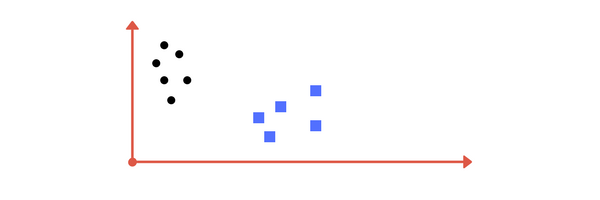


You might have come up with something similar to following image (image B). It fairly separates the two classes. Any point that is left of line falls into black circle class and on right falls into blue square class. Separation of classes. That’s what SVM does. It finds out a line/ hyper-plane (in multidimensional space that separate outs classes). Shortly, we shall discuss why I wrote multidimensional space.

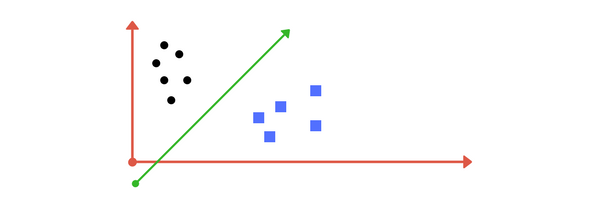
1. Making it a Bit complex…
So far so good. Now consider what if we had data as shown in image below? Clearly, there is no line that can separate the two classes in this x-y plane. So what do we do? We apply transformation and add one more dimension as we call it z-axis. Lets assume value of points on z plane, w = x² + y². In this case we can manipulate it as distance of point from z-origin. Now if we plot in z-axis, a clear separation is visible and a line can be drawn .

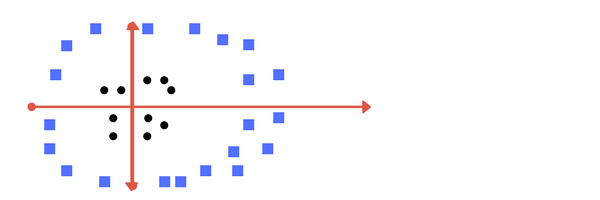

Can you draw a separating line in this plane?

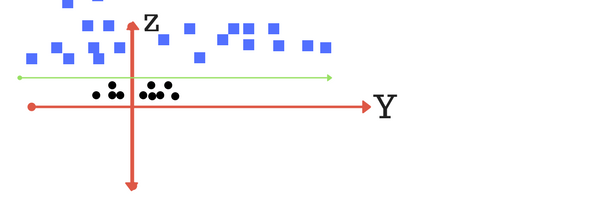


plot of zy axis. A separation can be made here.
When we transform back this line to original plane, it maps to circular boundary as shown in image E. These transformations are called kernels.

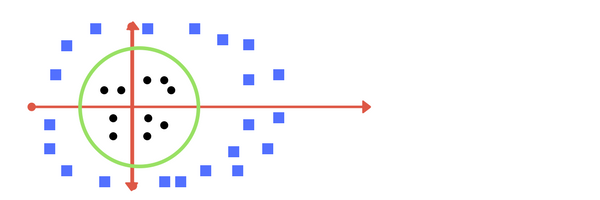


Transforming back to x-y plane, a line transforms to circle.
Thankfully, you don’t have to guess/ derive the transformation every time for your data set. The sklearn library's SVM implementation provides it inbuilt.

2. Making it a little more complex…
What if data plot overlaps? Or, what in case some of the black points are inside the blue ones? Which line among 1 or 2?should we draw?
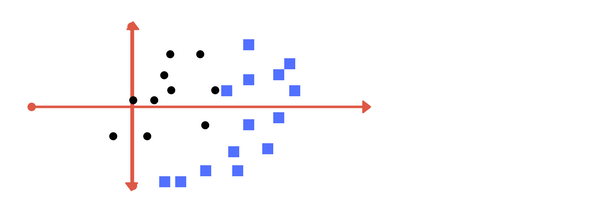
What in this case?

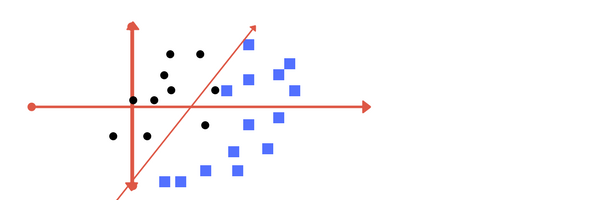
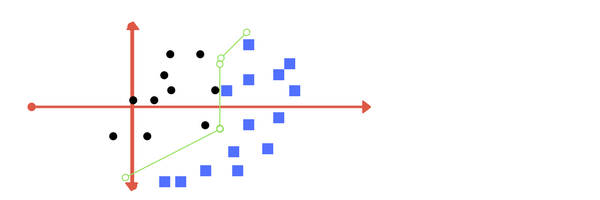

Which one do you think? Well, both the answers are correct. The first one tolerates some outlier points. The second one is trying to achieve 0 tolerance with perfect partition.
But, there is trade off. In real world application, finding perfect class for millions of training data set takes lot of time. As you will see in coding. This is called regularization parameter. In next section, we define two terms regularization parameter and gamma. These are tuning parameters in SVM classifier. Varying those we can achive considerable non linear classification line with more accuracy in reasonable amount of time. In coding exercise (part 2 of this chapter) we shall see how we can increase the accuracy of SVM by tuning these parameters.

## Questão 57
Usar o método de classificação do Support Vector Machine (SVM) usando a biblioteca de Machine Learning da OpenCv. Deve-se fazer com os métodos Hold Out e Leave One Out. Tudo deve ser feito utilizando a estrutura Mat da OpenCv. Faça os testes do SVM com os Kernels Linear, polinomial, Sigmoidal e RBF.

In [1]:
import pandas as pd
import csv
from sklearn.svm import SVC

In [2]:
def hold_out(df, train_size, shuffle=True):

    # Shuffle the dataframe if the shuffle is set to true
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)

    # Convert the rows of the dataframe into a list of lists
    data = []
    for row in df.iterrows():
        index, values = row
        data.append(values.tolist())

    # Split the data into train and test
    X_train = data[:int(train_size*len(data))]
    X_test = data[int(train_size*len(data)):]

    # Get the correspondent labels to each feature vector
    y_train = [int(x[-1]) for x in X_train]
    y_test = [int(x[-1]) for x in X_test]

    # Remove the labels from the train and test vectors
    X_train = [x[:-1] for x in X_train]
    X_test = [x[:-1] for x in X_test]

    return X_train, X_test, y_train, y_test


def leave_one_out(df, shuffle=True):

    # Shuffle the dataframe if the shuffle is set to true
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)

    # Convert the rows of the dataframe into a list of lists
    data = []
    for row in df.iterrows():
        index, values = row
        data.append(values.tolist())

    # Create a list of lists, in which each iteration of leave one out will be stored
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for i in range(len(data)):
        train = data.copy()
        train.remove(data[i])

        test = data[i]

        # Get the correspondent labels to each feature vector
        y_train.append([int(x[-1]) for x in train])
        y_test.append(int(test[-1]))

        # Remove the labels from the train and test vectors
        X_train.append([x[:-1] for x in train])
        X_test.append(test[:-1])

    return X_train, X_test, y_train, y_test


def read_data(file):
    # Load the features of a file in a dataframe
    return pd.read_csv(file, sep=',', header=None)


In [3]:
# Read the file with the features to classify
filename = 'features.txt'
features = read_data(filename)

# Split the database using hold out
X_train, X_test, y_train, y_test = hold_out(features, train_size=0.9)

# Create a SVM object (Change the kernels: 'linear', 'poly', 'rbf', 'sigmoid')
svm = SVC(kernel='rbf', gamma='auto')

# Train the model
svm.fit(X_train, y_train)

# Evaluate in the test data
predictions = svm.predict(X_test)

 # Convert the results to a list
predictions = list(predictions)

# Calculates the accuracy using hold out
count = 0
for x, y in zip(y_test, predictions):
    if x == y:
        count += 1

accuracy = count/len(y_test)
print('Accuracy using hold out: {:.4f}'.format(accuracy))

# Save the true and the predicted labels to use in question 59 and 60
with open('true_and_predict_57.csv', 'w') as outfile:
    rows = [y_test, predictions]
    writer = csv.writer(outfile, delimiter=',')
    writer.writerows(rows)

# Split the database using leave one out
X_train, X_test, y_train, y_test = leave_one_out(features)

# Apply SVM
print('[INFO] Starting leave one out training...')
count = 0
sample_count = 0
for train_set, test_set, label_train, label_test in zip(X_train, X_test, y_train, y_test):
    print('[INFO] Training sample {}/{}'.format(sample_count+1, len(y_train)))
    sample_count += 1

    # Create a SVM object (Change the kernels: 'linear', 'poly', 'rbf', 'sigmoid')
    svm = SVC(kernel='rbf', gamma='auto')

    # Train the model
    svm.fit(train_set, label_train)

    # Evaluate in the test data
    new_list = []
    new_list.append(test_set)
    prediction = svm.predict(new_list)

    if prediction == label_test:
        count += 1

accuracy = count / len(y_test)

print('Accuracy using leave one out: {:.4f}'.format(accuracy))

Accuracy using hold out: 0.6667
[INFO] Starting leave one out training...
[INFO] Training sample 1/473
[INFO] Training sample 2/473
[INFO] Training sample 3/473
[INFO] Training sample 4/473
[INFO] Training sample 5/473
[INFO] Training sample 6/473
[INFO] Training sample 7/473
[INFO] Training sample 8/473
[INFO] Training sample 9/473
[INFO] Training sample 10/473
[INFO] Training sample 11/473
[INFO] Training sample 12/473
[INFO] Training sample 13/473
[INFO] Training sample 14/473
[INFO] Training sample 15/473
[INFO] Training sample 16/473
[INFO] Training sample 17/473
[INFO] Training sample 18/473
[INFO] Training sample 19/473
[INFO] Training sample 20/473
[INFO] Training sample 21/473
[INFO] Training sample 22/473
[INFO] Training sample 23/473
[INFO] Training sample 24/473
[INFO] Training sample 25/473
[INFO] Training sample 26/473
[INFO] Training sample 27/473
[INFO] Training sample 28/473
[INFO] Training sample 29/473
[INFO] Training sample 30/473
[INFO] Training sample 31/473
[INFO

[INFO] Training sample 300/473
[INFO] Training sample 301/473
[INFO] Training sample 302/473
[INFO] Training sample 303/473
[INFO] Training sample 304/473
[INFO] Training sample 305/473
[INFO] Training sample 306/473
[INFO] Training sample 307/473
[INFO] Training sample 308/473
[INFO] Training sample 309/473
[INFO] Training sample 310/473
[INFO] Training sample 311/473
[INFO] Training sample 312/473
[INFO] Training sample 313/473
[INFO] Training sample 314/473
[INFO] Training sample 315/473
[INFO] Training sample 316/473
[INFO] Training sample 317/473
[INFO] Training sample 318/473
[INFO] Training sample 319/473
[INFO] Training sample 320/473
[INFO] Training sample 321/473
[INFO] Training sample 322/473
[INFO] Training sample 323/473
[INFO] Training sample 324/473
[INFO] Training sample 325/473
[INFO] Training sample 326/473
[INFO] Training sample 327/473
[INFO] Training sample 328/473
[INFO] Training sample 329/473
[INFO] Training sample 330/473
[INFO] Training sample 331/473
[INFO] T